In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv("../data/raw/heart.csv")

In [3]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1


### Data description

1. age
2. sex
3. cp - chest pain type (4 values)
4. trestbps - resting blood pressure
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl
7. restecg - resting electrocardiographic results (values 0,1,2)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Missing values

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values

### Duplicated values

In [6]:
data.duplicated().sum()

1

In [7]:
data[data.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


We have 1 duplicated row, lets drop it:

In [8]:
def drop_duplicates(df):
    '''
    При вызове метода drop_duplicates()
    вместе с повторяющимися строками удаляются их индексы, поэтому
    используется с методом reset_index()
    
    аргумент drop со значением True, чтобы не создавать столбец со
    старыми значениями индексов
    '''
    return df.drop_duplicates().reset_index(drop=True)
    
data = drop_duplicates(data)

In [9]:
data.duplicated().sum()

0

In [10]:
data.iloc[163:165]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


It's OK now

### Data describe (mean, std, min, max, median)

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Unique values

In [12]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
cat_features = [
    'sex',
    'cp',
    'fbs',
    'restecg',
    'exang',
    'slope',
    'ca',
    'thal',
]

numerical_features = [
    'age',
    'trestbps',
    'chol',
    'thalach',
    'oldpeak',
]

### Outliers (for numerical features)

Column 'age' has no outliers values


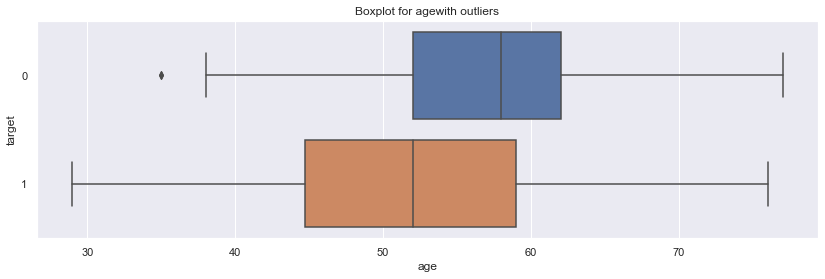

Column 'trestbps' has outliers values
Outliers boundary: [90.0, 170.0]
Outliers count: 9
Outliers percent: 2.98%


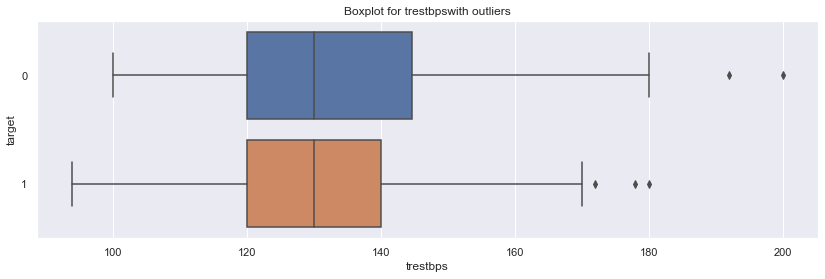

Column 'chol' has outliers values
Outliers boundary: [115.4, 370.4]
Outliers count: 5
Outliers percent: 1.66%


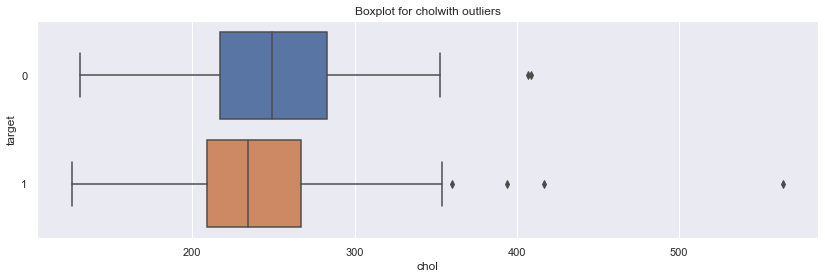

Column 'thalach' has outliers values
Outliers boundary: [84.1, 215.1]
Outliers count: 1
Outliers percent: 0.33%


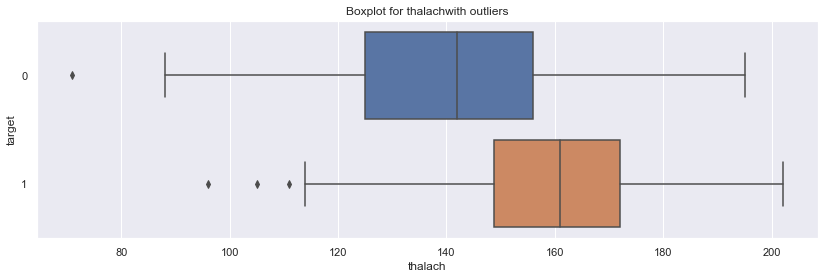

Column 'oldpeak' has outliers values
Outliers boundary: [-2.4, 4.0]
Outliers count: 5
Outliers percent: 1.66%


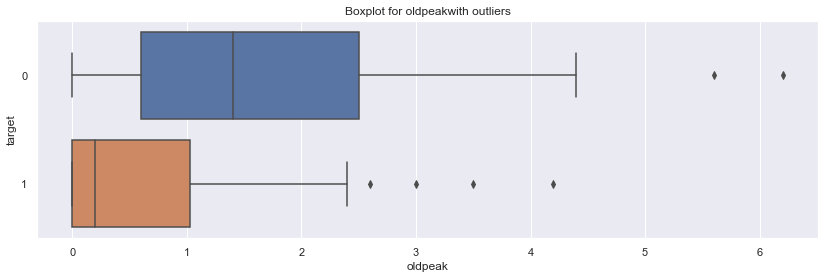

In [14]:
def check_outliers(df, column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    left = round(perc25 - 1.5 * IQR, 1)
    right = round(perc75 + 1.5 * IQR, 1)
    if (df[column].max() > right) | (df[column].min() < left):
        print(f"Column '{column}' has outliers values")
        print(f"Outliers boundary: [{left}, {right}]")
        number_outliers = df[(df[column] > right) | (df[column] < left)].shape[0]
        print(f"Outliers count: {number_outliers}")
        print(f"Outliers percent: {round(number_outliers / df.shape[0] * 100, 2)}%")
    else:
        print(f"Column '{column}' has no outliers values")
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y=df['target'], data=df, orient='h')
    ax.set_title('Boxplot for ' + column + 'with outliers')
    plt.show();
        
for feature in numerical_features:
    check_outliers(data, feature)

Lets see rows with outliers values:

In [15]:
data[(data['trestbps'] < 70) |(data['trestbps'] > 170) | 
     (data['chol'] < 115.4) | (data['chol'] > 370.4) | 
     (data['thalach'] < 84.1) | (data['thalach'] > 215.1) |
     (data['oldpeak'] < -2.4) | (data['oldpeak'] > 4.0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
202,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
203,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
219,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
220,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


### Data correlation

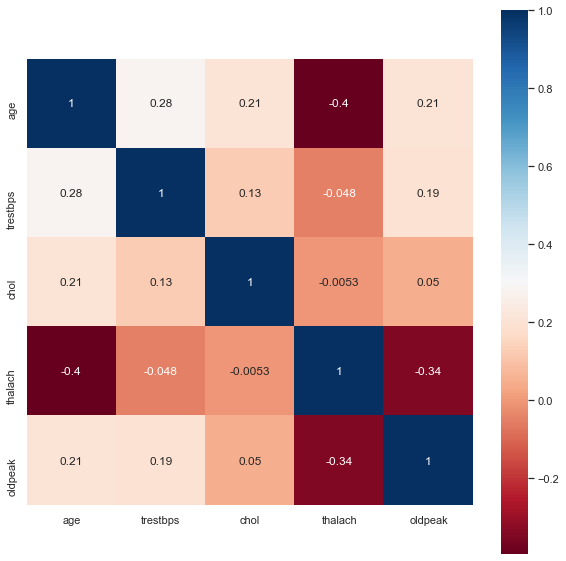

In [16]:
plt.figure(figsize=(10, 10))

sns.heatmap(data[numerical_features].corr(),
            square=True,
            annot=True,
            #fmt=".2f",
            #linewidths=0.2,
            cmap="RdBu");

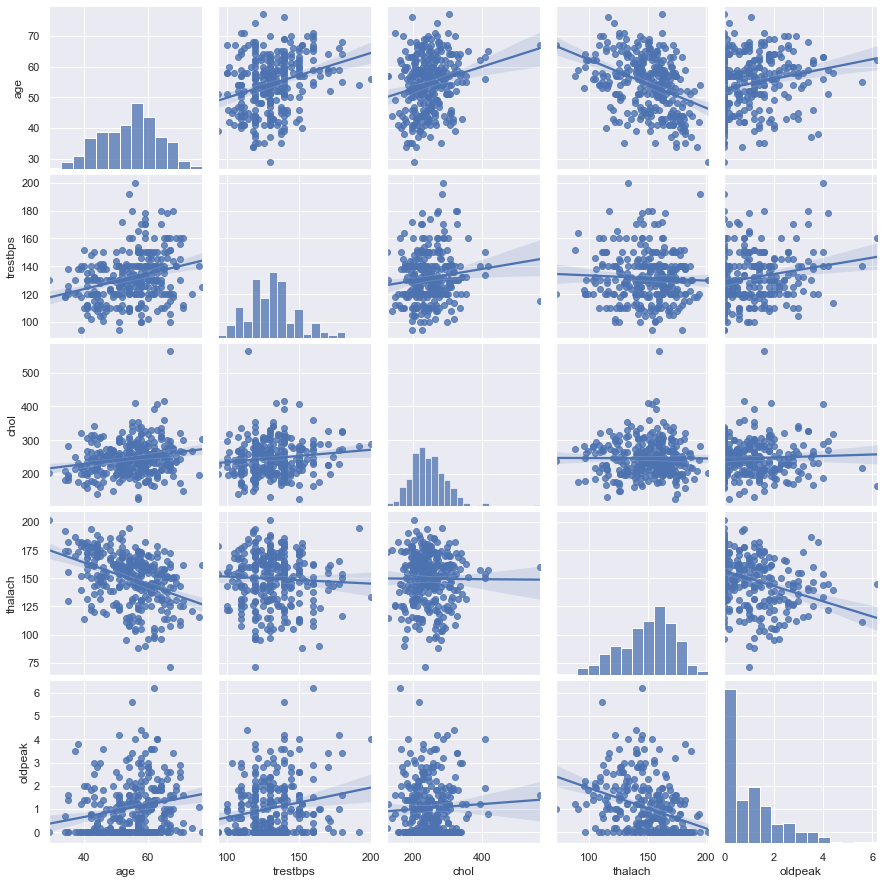

In [17]:
sns.pairplot(data[numerical_features], kind='reg');

### Categorical features

Number of unique values in column 'sex' = 2
Unique values: [1 0]
Number of values occuring more than 30 times: 2


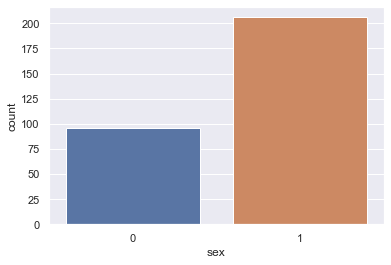

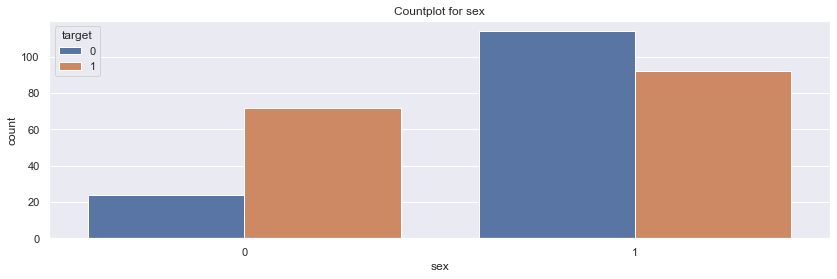

Number of unique values in column 'cp' = 4
Unique values: [3 2 1 0]
Number of values occuring more than 30 times: 3


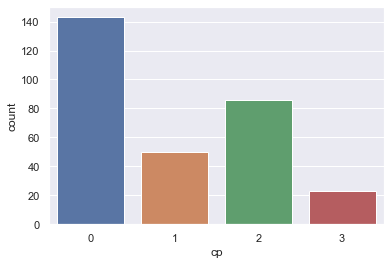

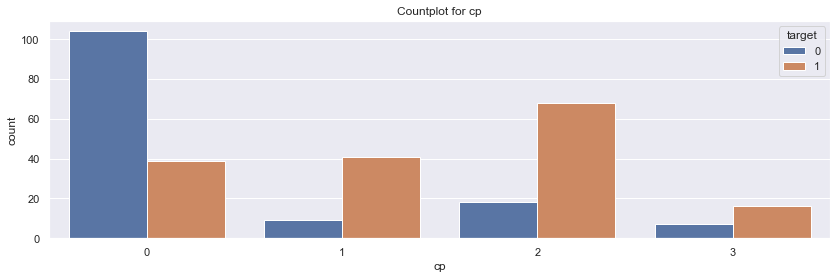

Number of unique values in column 'fbs' = 2
Unique values: [1 0]
Number of values occuring more than 30 times: 2


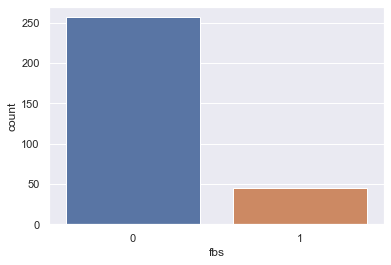

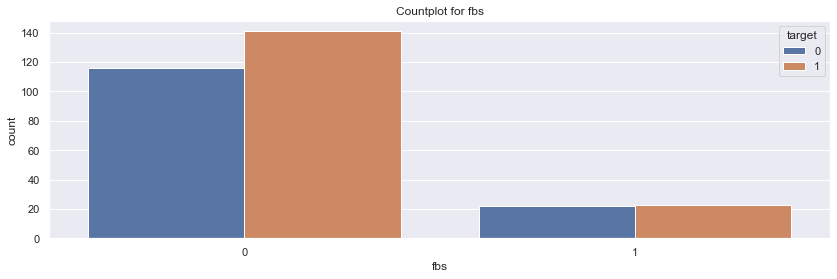

Number of unique values in column 'restecg' = 3
Unique values: [0 1 2]
Number of values occuring more than 30 times: 2


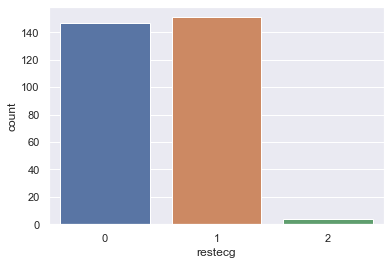

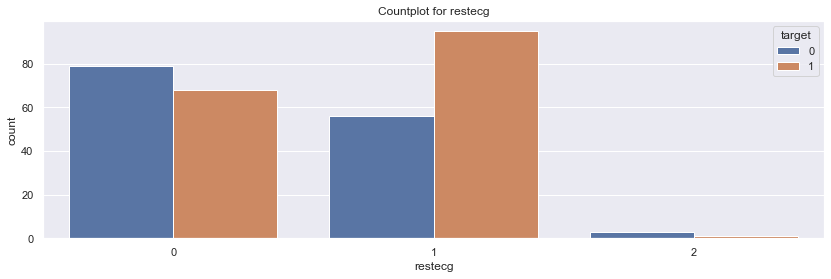

Number of unique values in column 'exang' = 2
Unique values: [0 1]
Number of values occuring more than 30 times: 2


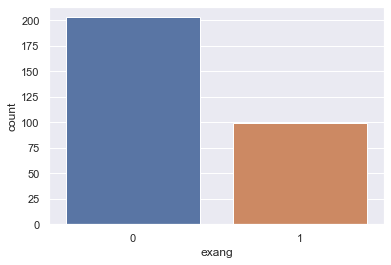

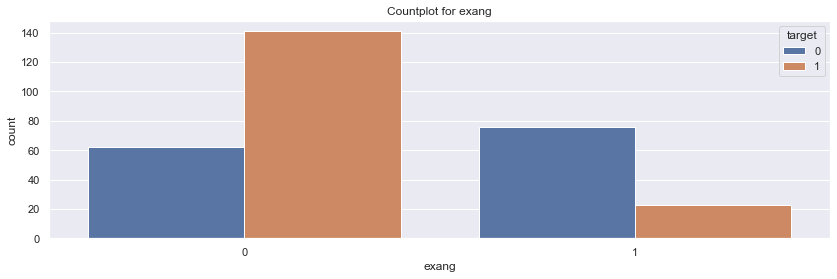

Number of unique values in column 'slope' = 3
Unique values: [0 2 1]
Number of values occuring more than 30 times: 2


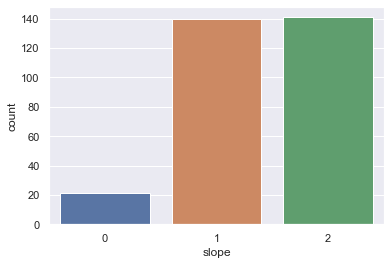

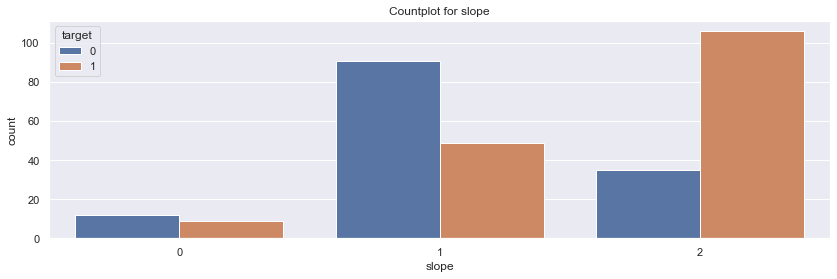

Number of unique values in column 'ca' = 5
Unique values: [0 2 1 3 4]
Number of values occuring more than 30 times: 3


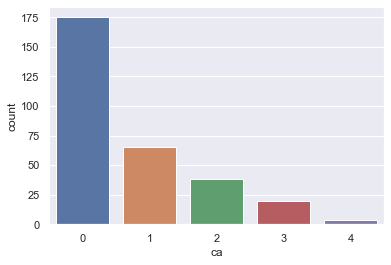

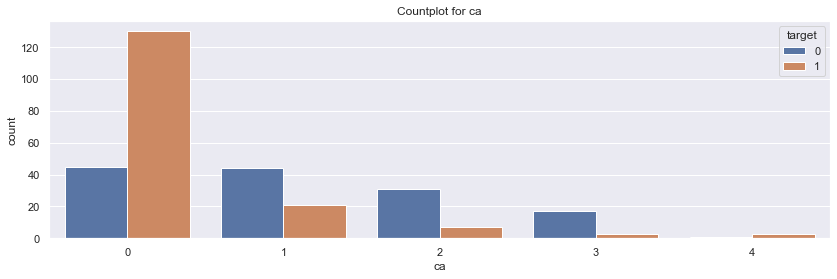

Number of unique values in column 'thal' = 4
Unique values: [1 2 3 0]
Number of values occuring more than 30 times: 2


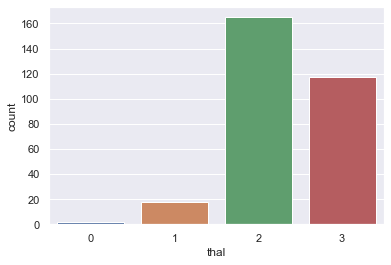

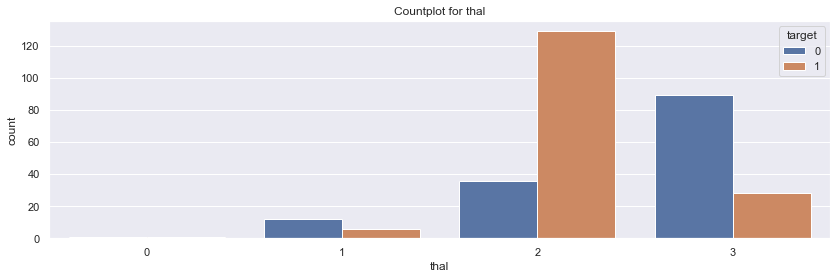

In [18]:
def nominative_unique_freq(df, column, n):
    print(f"Number of unique values in column '{column}' = {df[column].nunique()}")
    print(f"Unique values: {data[column].unique()}")
    print(f"Number of values occuring more than {n} times: {(df[column].value_counts() >=n).sum()}")
    sns.countplot(x=column, data=df)
    plt.show();
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.countplot(x=df[column], hue=df['target'])
    ax.set_title('Countplot for ' + column)
    plt.show();

for feature in cat_features:
    nominative_unique_freq(data, feature, n=30)

Проверим, есть ли статистическая разница в распределении значений target по категориальным признакам с помощью теста Стьюдента:

In [20]:
from itertools import combinations
from scipy.stats import ttest_ind


def get_stat_dif(df, column, p_value=0.05):
    cols = df[column].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        a = df[df[column] == comb[0]]['target']
        b = df[df[column] == comb[1]]['target']
        if ttest_ind(a,b).pvalue <= p_value / len(combinations_all): # Учли поправку Бонферони
            print(f"Найдены статистически значимые различия для признака {column}")
            break
                
for feature in cat_features:
    get_stat_dif(data, feature)

Найдены статистически значимые различия для признака sex
Найдены статистически значимые различия для признака cp
Найдены статистически значимые различия для признака restecg
Найдены статистически значимые различия для признака exang
Найдены статистически значимые различия для признака slope
Найдены статистически значимые различия для признака ca
Найдены статистически значимые различия для признака thal


### Summary

1. В данных отсутсвуют пропущенные значения
2. В данных присутствует 1 дубликат
3. Найдены выбросы в следующих столбцах: trestbps, chol, thalach, oldpeak